In [22]:
#analyse the calibration data
#filter it to generate a consistent line of temperature and resistance values.

#karels sensor is the XX one,
#the dnp sensor is the AA one.

import numpy as np
import matplotlib.pyplot as plt

data_all = np.loadtxt("./calibration.txt")
d_XX = np.loadtxt("./sensor_XX5LT.dat")
d_AA = np.loadtxt("./sensor_AA5LT.dat")

%matplotlib inline

temperature = data_all[:, 3]
r_REF = data_all[:,2]
r_AA = data_all[:,6]
r_XX = data_all[:,9]

#Data Analysis

Data above 8.849 K was obtained using a sweep up to 190 K and then warming up overnight.

The minimum temperature achieved in this run was 1.412 K, the maximum 292.638K.

##Plot of all the data

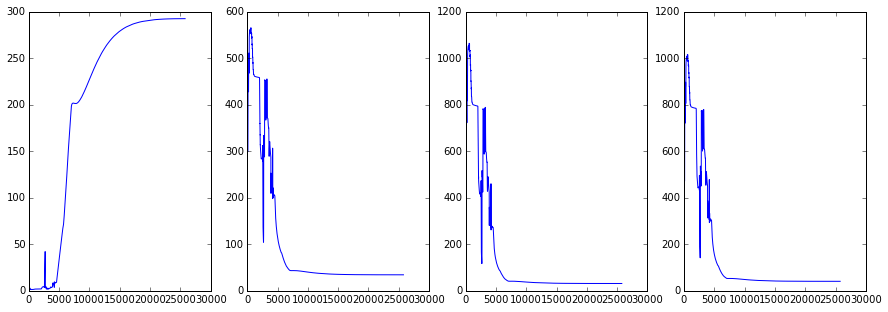

In [26]:
#plots vs time
plt.figure(figsize = (15,5))
plt.subplot(1,4,1)
plt.plot(temperature)

plt.subplot(1,4,2)
plt.plot(r_REF)

plt.subplot(1,4,3)
plt.plot(r_AA)

plt.subplot(1,4,4)
plt.plot(r_XX)

#Plot of the data above 8.849 K / after sample 4500
These data are obtained in a continuous sweep.

temperature at #4500 8.849


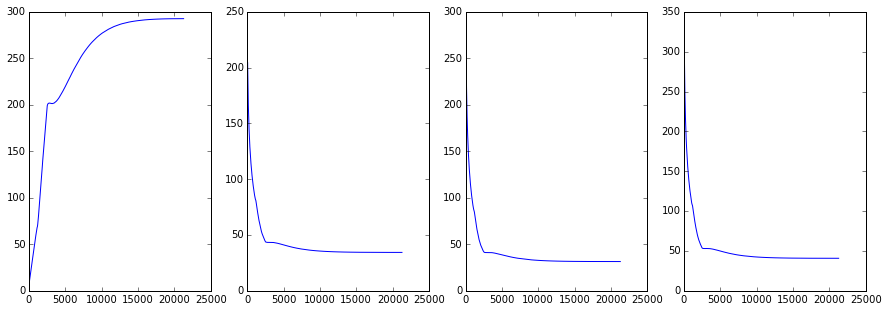

In [27]:

#plots vs time

plt.figure(figsize = (15,5))
plt.subplot(1,4,1)
plt.plot(temperature[4500:])

plt.subplot(1,4,2)
plt.plot(r_REF[4500:])

plt.subplot(1,4,3)
plt.plot(r_AA[4500:])

plt.subplot(1,4,4)
plt.plot(r_XX[4500:])

print "temperature at #4500", temperature[4500]
#plt.plot(d_XX[:,1])
#plt.show()

#very good, use these data above 8.849 K

(100, 800)

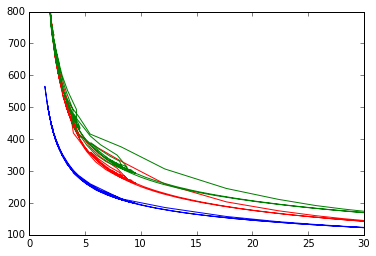

In [32]:
plt.plot(temperature, r_REF, "-b")
plt.plot(temperature, r_AA, "-r")
plt.plot(temperature, r_XX, "-g")
plt.xlim([0,30])
plt.ylim([100,800])

##Plot of the data below 8.849 K, up to point 4500

temperature at #580 1.412
temperature at #2400 4.351
temperature at #2530 4.351
temperature at #2555 4.544
temperature at #3906 4.671
temperature at #3909 5.573
temperature at #3930 5.584
temperature at #4189 8.758


8.7579999999999991

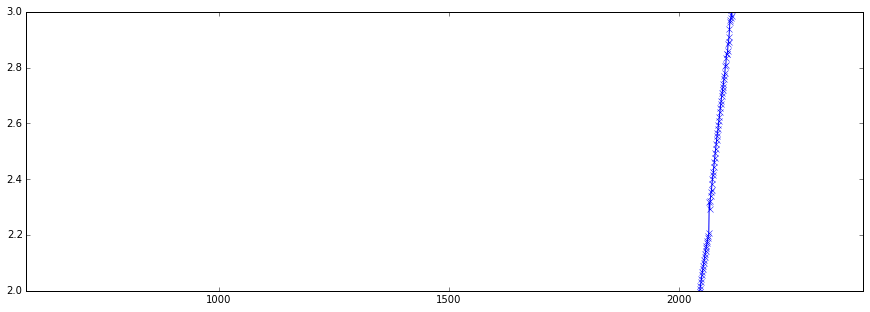

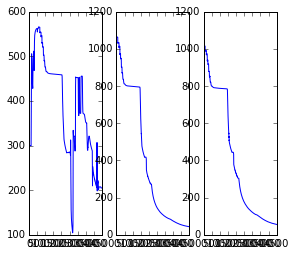

In [144]:

#plots vs time

plt.figure(figsize = (15,5))
#plt.subplot(1,4,1)
plt.plot(temperature[0:4500], "-x")
plt.xlim([580,2400])
plt.ylim([2,3])

plt.figure()
plt.subplot(1,4,2)
plt.plot(r_REF[:4500])

plt.subplot(1,4,3)
plt.plot(r_AA[:4500])

plt.subplot(1,4,4)
plt.plot(r_XX[:4500])

#use these data to go from 1.425 to 4.351K
print "temperature at #580", temperature[580]
print "temperature at #2400", temperature[2400]
r1 = [580,2400]

#use these data to go from 4.351K to 4.544 K
print "temperature at #2530", temperature[2530]
print "temperature at #2555", temperature[2555]
r2 = [2530,2555]

#use these data from 4.671 to 5.573 K
print "temperature at #3906", temperature[3906]
print "temperature at #3909", temperature[3909]
r3 = [3906,3909]
#plt.plot(d_XX[:,1])
#plt.show()

#use these data from 5.584 K to 8.758 K
print "temperature at #3930", temperature[3931]
print "temperature at #4189", temperature[4189]
r4 = [3931, 4189]
#, data_all[r3[0]:r3[1], :]
filteredData = np.vstack((data_all[r1[0]:r1[1], :], data_all[r2[0]:r2[1], :], data_all[r4[0]:r4[1], :], data_all[4500:-1, :]))

#min of temperature is at index 580



np.argmin(temperature)
#very good, use these data above 8.849 K

temperature[389+3800]

(23368L, 10L)


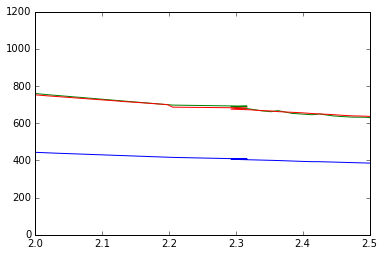

In [143]:
plt.plot(filteredData[:,3], filteredData[:,2], "-")
plt.plot(filteredData[:,3], filteredData[:,6])
plt.plot(filteredData[:,3], filteredData[:,9])
plt.xlim([2.0,2.5])
print np.shape(filteredData)
#from this plot it can be seen that the data between 4.5 and 5.5 Kelvin are off a bit. 
#they should be ignored. 

min temp:  1.412


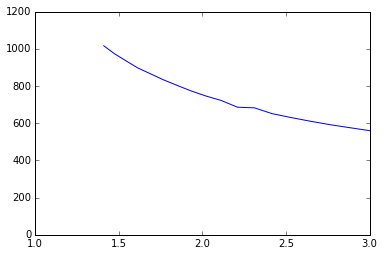

In [150]:
x = filteredData[:,3]
r_AA = filteredData[:,6]
r_XX = filteredData[:,9]

print "min temp: ", np.min(x)

xvals = np.logspace(np.log10(np.min(x)), np.log10(np.max(x)), num=120)
yinterp_XX = np.interp(xvals, x, r_XX)
yinterp_AA = np.interp(xvals, x, r_AA)

plt.plot(xvals, yinterp_XX)
plt.xlim([1,3])

headerString_AA = """######################################

  Calibration Log
  This is the calibration file for sensor X98982
  The model of this sensor is CX-1030-AA

  Temperature reading based on LakeShore X96620
  Calibrated sensor: X96620.dat
  Model CX-1010-SD-HT-0.1M

  The data were recorded in constant voltage mode with 7 mV.
######################################

Temperature (K)    Resistance (Ohm)"""

headerString_XX = """######################################

  Calibration Log
  This is the calibration file for sensor X107968
  The model of this sensor is CX-1030-SD-HT

  Temperature reading based on LakeShore X96620
  Calibrated sensor: X96620.dat
  Model CX-1010-SD-HT-0.1M

  The data were recorded in constant voltage mode with 7 mV.
  
######################################

Temperature (K)    Resistance (Ohm)"""


np.savetxt("X107968.dat", np.c_[xvals, yinterp_XX], header = headerString_XX, comments = "#")
np.savetxt("X98982.dat", np.c_[xvals, yinterp_AA], header = headerString_AA, comments = "#")

In [130]:
yinterp_AA

array([ 1063.992     ,  1014.70168801,   970.28748986,   925.05782706,
         888.91224953,   851.2211643 ,   816.58116381,   783.26354697,
         752.76562613,   724.96830708,   697.0648675 ,   691.94600366,
         646.97581162,   621.84776119,   599.52688791,   577.14527153,
         557.37718285,   538.4350602 ,   521.82212054,   508.46088769,
         485.66500396,   473.69925089,   458.58776626,   444.75952211,
         431.25656363,   419.03851142,   406.45331269,   396.49728171,
         386.14303236,   375.31411823,   363.98877948,   352.36982435,
         343.51139725,   334.08577133,   325.5752382 ,   317.48338426,
         308.86259657,   301.13601687,   294.03903065,   286.09300509,
         279.59055432,   272.34337731,   265.30977116,   259.14956107,
         252.75496483,   246.88879006,   241.03438691,   235.46570593,
         229.89911078,   224.62888482,   219.31840228,   214.33998159,
         209.38665224,   204.53089857,   199.8800209 ,   195.28512823,
      